In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np
from thermo import simple_formula_parser
import datetime

In [2]:
df = pd.read_csv('ybaco_materials_all.csv')
df.head()


,Unnamed: 0,Unnamed: 0.1,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0,16,5,92.729214,61.051113,73.132787,37.513930,1.449309,1.146919,122.90607,...,0.0,0.0,0.0,0.0,0.0,0,0,0,82.0,Y1Ba1.5Ca0.5Cu3O7
1,1,28,4,64.632218,55.790060,48.775792,35.178830,1.139875,0.931491,122.90607,...,0.0,0.0,0.0,0.0,0.0,0,0,0,76.9,Yb16Ba1Cu2O
2,2,29,4,97.481600,152.464120,70.110388,137.387467,1.154762,0.387216,157.05460,...,0.0,0.0,0.0,0.0,0.0,0,0,0,65.3,Yb1.8Ba0.2Cu1O
3,3,30,4,97.481600,104.627000,70.110388,73.428983,1.154762,0.809544,157.05460,...,0.0,0.0,0.0,0.0,0.0,0,0,0,78.6,Yb6Ba1Cu1O
4,4,31,4,97.481600,139.466267,70.110388,115.819575,1.154762,0.605632,157.05460,...,0.0,0.0,0.0,0.0,0.0,0,0,0,79.3,Yb1.62La0.18Ba0.18Sr0.02Cu1O


In [3]:
y = df['critical_temp']
x = df.drop(['critical_temp'], axis=1).drop(['Unnamed: 0'], axis = 1).drop(['Unnamed: 0.1'], axis = 1).select_dtypes(exclude=['object'])

In [4]:

train_X, test_X, train_y, test_y = train_test_split(x.values, y.values, test_size=0.2)

In [5]:
df_imputer = SimpleImputer()
train_X = df_imputer.fit_transform(train_X)
test_X = df_imputer.transform(test_X)

In [6]:
avg = 0
predictions = 0
model = XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.50,learning_rate = 0.02, max_depth = 16, alpha = 1, n_estimators = 374)
model.fit(train_X, train_y, verbose=False) # treinando o modelo


XGBRegressor(alpha=1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.02, max_delta_step=0,
             max_depth=16, min_child_weight=1, missing=None, n_estimators=374,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [7]:
for i in range(1, 26):
    predictions = model.predict(test_X) # testando a predição
    avg += mean_absolute_error(predictions, test_y)

In [8]:
print("rmse value: " + str(sqrt(avg/25)))

rmse value: 3.00634371659718


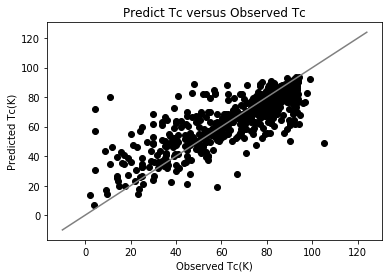

In [13]:

plt.title("Predict Tc versus Observed Tc")
plt.plot(test_y, predictions, "o", color="black")
plt.plot(range(-10, 125), range(-10, 125), color = 'gray')
plt.xlabel("Observed Tc(K)")
plt.ylabel("Predicted Tc(K)")
#plt.show -> plt.savefig
plt.savefig("plot_test")

In [10]:

ybaco7 = df.loc[df['Unnamed: 0'] == 29]
ybaco7 = ybaco7.drop(['material'], axis=1)
observedValue = np.array(ybaco7['critical_temp'])
ybaco7 = ybaco7.drop(['critical_temp'], axis=1)

ybaco7 = ybaco7.drop(['Unnamed: 0'], axis = 1).drop(['Unnamed: 0.1'], axis = 1).select_dtypes(exclude=['object'])

ybaco7 = np.array(ybaco7)

print("Predicted value for Y1Ba2Cu3O7: ", model.predict(ybaco7)[0])
print("Observed value for Y1Ba2Cu3O7: ", observedValue[0])


Predicted value for Y1Ba2Cu3O7:  90.41119
Observed value for Y1Ba2Cu3O7:  91.85


In [63]:
import smtplib

In [64]:
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.base import MIMEBase
from email.mime.application import MIMEApplication
from email import encoders

In [65]:
from os.path import basename

In [66]:
targetEmail = "fabioliradev@gmail.com"
ccEmail = "josiasdsj1@gmail.com"

In [67]:
 msg = MIMEMultipart()

In [68]:
msg['From'] = "data.supercon@gmail.com"
msg['To'] = targetEmail
msg['Subject'] = "sending over python"
msg['Cc'] = ', '.join([ccEmail])

In [69]:
body = "rock porra"

In [70]:
msg.attach(MIMEText(body, 'plain'))

In [72]:
filename = "plot_test"
attachment = open('plot_test.png', "rb")
print(attachment)

<_io.BufferedReader name='plot_test.png'>


In [73]:
part = MIMEApplication(open("plot_test.png", "rb").read(), Name=basename("plot_test.png"))
part['Content-Disposition'] = 'attachment; filename="%s"' % basename("plot_test.png")

msg.attach(part)

In [74]:
mailConfig = { "email": "data.supercon@gmail.com", "password": "rnzizqregtssljji" }

In [75]:
s = smtplib.SMTP('smtp.gmail.com', 587)
s.starttls()
s.login(mailConfig["email"], mailConfig["password"])
s.send_message(msg)
s.quit()

(221, b'2.0.0 closing connection a17sm14609883qka.37 - gsmtp')

In [77]:
agora = datetime.datetime.now()

In [83]:
print(agora.strftime("%Y-%m-%d_%H:%M"))

2020-04-28_19:49
